# Generating An Imbalanced Dataset (3 classes)

In [ ]:
import sklearn
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# define an imbalanced dataset 3 classes
# 2 informative features
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
    n_clusters_per_class=1, weights=[0.1,0.1, 0.98], flip_y=0, n_classes=3,
    n_redundant=0, n_repeated=0,class_sep=0.8,random_state=0)

In [ ]:
# convert to pandas Dataframe
imb_df = pd.DataFrame(X, columns = ['X1','X2'])
imb_df['y'] = y

# Examine Dataset

In [ ]:
imb_df.head()

,X1,X2,y
0,0.798262,-0.814469,2
1,0.927242,-1.759108,2
2,0.488034,-1.394444,2
3,1.221946,-1.904256,2
4,0.690948,0.815223,2


In [ ]:
imb_df['y'].value_counts()

2    800
1    100
0    100
Name: y, dtype: int64

In [ ]:
imb_df.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.000000
mean,0.653277,-0.466395,1.700000
std,0.707118,1.129523,0.640633
min,-2.557782,-3.287044,0.000000
25%,0.321684,-1.221648,2.000000
50%,0.739594,-0.554070,2.000000
75%,1.119917,0.186700,2.000000
max,2.673665,3.216878,2.000000


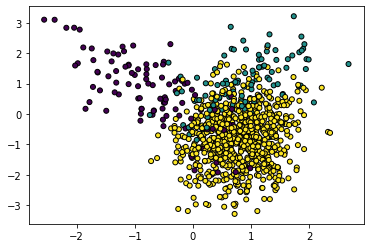

In [ ]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

In [ ]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

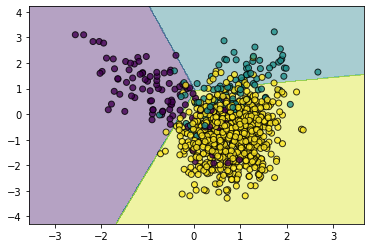

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)

ax = plt.axes()
plot_decision_function(X,y, clf,ax)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

Cross Validation Score Imb:
mean: 0.898
min: 0.87
max: 0.92


# Random Oversampling

In [ ]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC,
                                    KMeansSMOTE)
from imblearn.over_sampling import RandomOverSampler
from imblearn.base import BaseSampler

In [ ]:
pipeline = make_pipeline(RandomOverSampler(random_state=0),LogisticRegression(random_state=0))

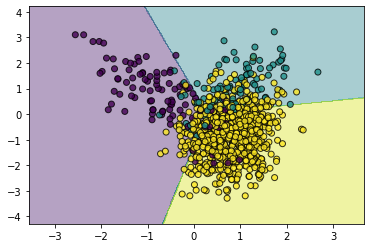

In [ ]:
ax2 = plt.axes()
pipeline.fit(X,y)
plot_decision_function(X, y, pipeline, ax2)

In [ ]:
scores = cross_val_score(pipeline, X, y, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

Cross Validation Score Imb:
mean: 0.7939999999999999
min: 0.73
max: 0.85


# ADASYN

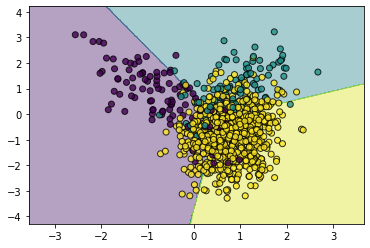

In [ ]:

clf_ad = make_pipeline(ADASYN(random_state=0), LogisticRegression())

ax3 = plt.axes()
clf_ad.fit(X,y)
plot_decision_function(X, y, clf_ad, ax3)

In [ ]:
scores = cross_val_score(clf_ad, X, y, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

Cross Validation Score Imb:
mean: 0.6859999999999999
min: 0.63
max: 0.75


# SMOTE

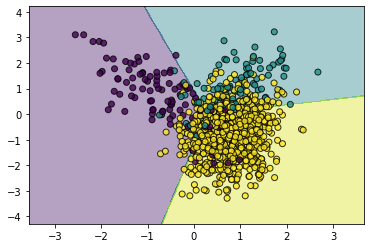

In [ ]:
pipe_smote = make_pipeline(SMOTE(random_state=0),LogisticRegression(random_state=0))

ax4 = plt.axes()
pipe_smote.fit(X,y)
plot_decision_function(X, y, pipe_smote, ax4)

In [ ]:
scores = cross_val_score(pipe_smote, X, y, cv=10)
scores = pd.Series(scores)
print('Cross Validation Score Imb:\nmean: {}\nmin: {}\nmax: {}'.format(scores.mean(),scores.min(),scores.max()))

Cross Validation Score Imb:
mean: 0.791
min: 0.73
max: 0.83
